### TODO:
* Possible to set two (or more) sets of coordinates? e.g. iline/xline and lat/lon
* `.to_segy` method
* orientation of plots (.T, origin)
* easy 64 -> 32 -> 16 -> u8

In [1]:
import segyio
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import xarray as xr
from ipywidgets import interact, IntSlider
import sys
sys.path.append("../")
import subsurface.seismic
from importlib import reload
reload(subsurface.seismic)


def p(i):
    seismic[:,:,i].plot()

In [2]:
# fp = "D:/datasets/iacopini_new_zealand/nz_realized"
# fp = "D:/datasets/gullfaks/gullfaks.segy"
fp = "../../../Documents/datasets/gullfaks.segy"

In [3]:
cube = segyio.tools.cube(fp)

In [4]:
extent = [452500, 459000, 6785500, 6788230, -1500, -2200]
xcoords, ycoords, zcoords = [np.linspace(extent[i], extent[i+1], cube.shape[int(i/2)]) for i in range(0,6,2)]
coords = [("x", xcoords), 
          ("y", ycoords), 
          ("z", zcoords)]

Load into Seismic wrapper for xr.DataArray from SEGY using `segyio`:

In [5]:
seismic = subsurface.seismic.from_segy(fp, coords=coords)

Create from `np.ndarray` (seismic cube):

Write slice to SEGY file:

## Plotting

### Trace

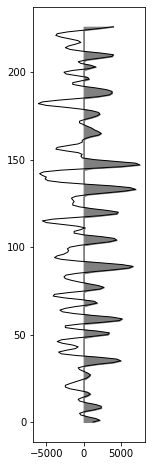

In [6]:
seismic[0,0,:].plot()

matplotlib.axes._subplots.AxesSubplot

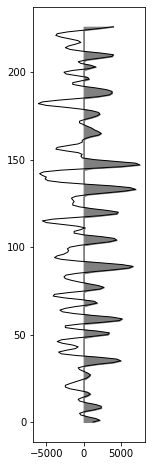

In [7]:
def _plot_1d(seismic):
    fig, ax = plt.subplots(figsize=(2,8))
    kwargs = dict(
        color="black",
        linewidth=1
    )
    y = np.arange(0, *seismic.data.shape)
    ax.plot(seismic.data, y, **kwargs)
    x1 = seismic.data.copy()
    x1[x1<=0] = 0
    ax.fill_betweenx(y, x1=x1, color="grey")
    return ax
    
    

type(_plot_1d(seismic[0,0,:]))

### Section

In [8]:
d = seismic[150,:,:].data

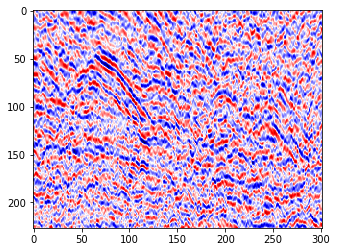

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(d.T, cmap="seismic", origin="upper")


### Cube

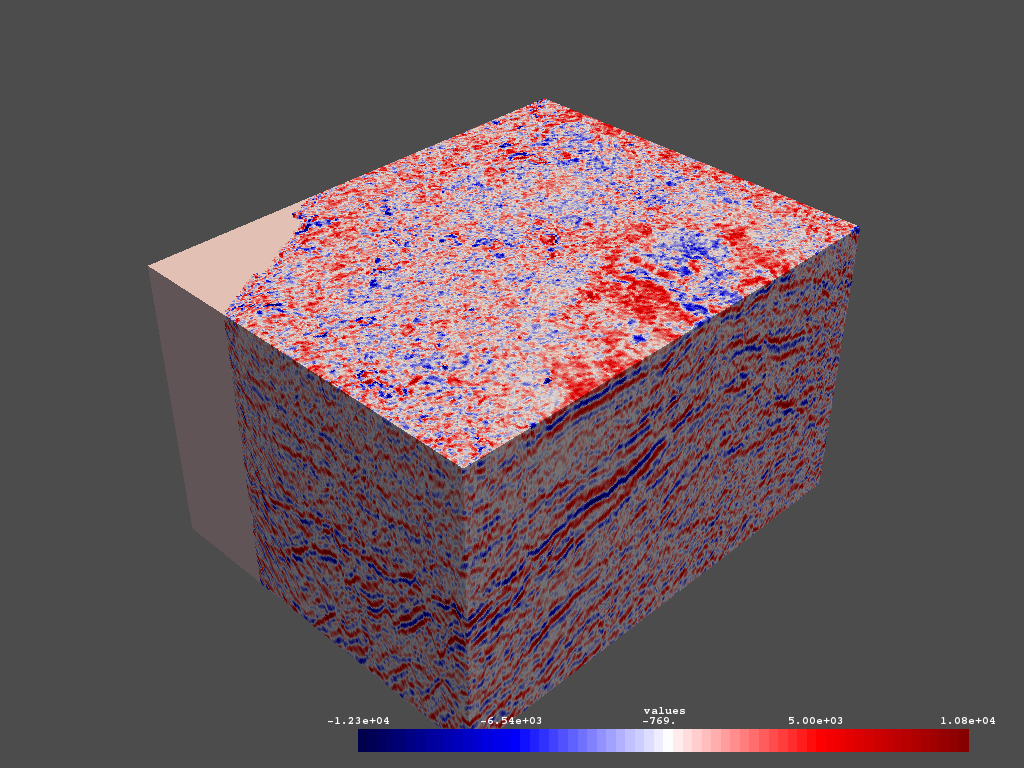

In [10]:
seismic.plot()

In [11]:
seismic.plot_3d_slices()

interactive(children=(FloatSlider(value=187.5, continuous_update=False, description='x', max=356.25, min=18.75…

In [12]:
import pyvista as pv

### Other

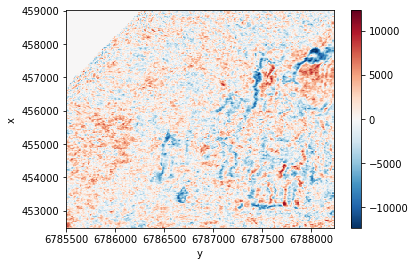

<function __main__.p(i)>

In [12]:
interact(p, i=IntSlider(value=92, min=0, max=seismic.data.shape[2]-1))

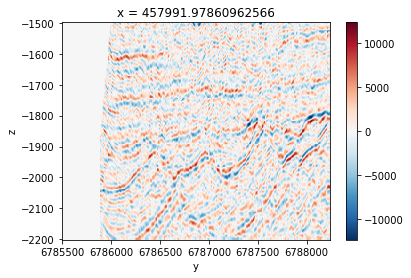

In [13]:
seismic.sel(x=458000, method="nearest").T.plot()

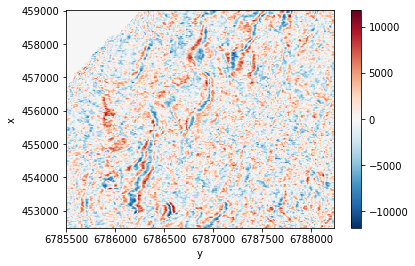

In [14]:
seismic[:, :, 150].plot()

In [15]:
import pyvista as pv

In [17]:
grid = pv.UniformGrid()

In [51]:
type(grid)

pyvista.grid.UniformGrid

In [19]:
seismic.data.shape

(375, 301, 227)

In [34]:
grid.spacing = (1, 1, 1)

In [35]:
grid.dimensions = np.array(seismic.data.shape) + 1

In [36]:
grid.cell_arrays["values"] = seismic.data.flatten(order="F")

In [46]:
cmap = plt.cm.get_cmap('RdBu')

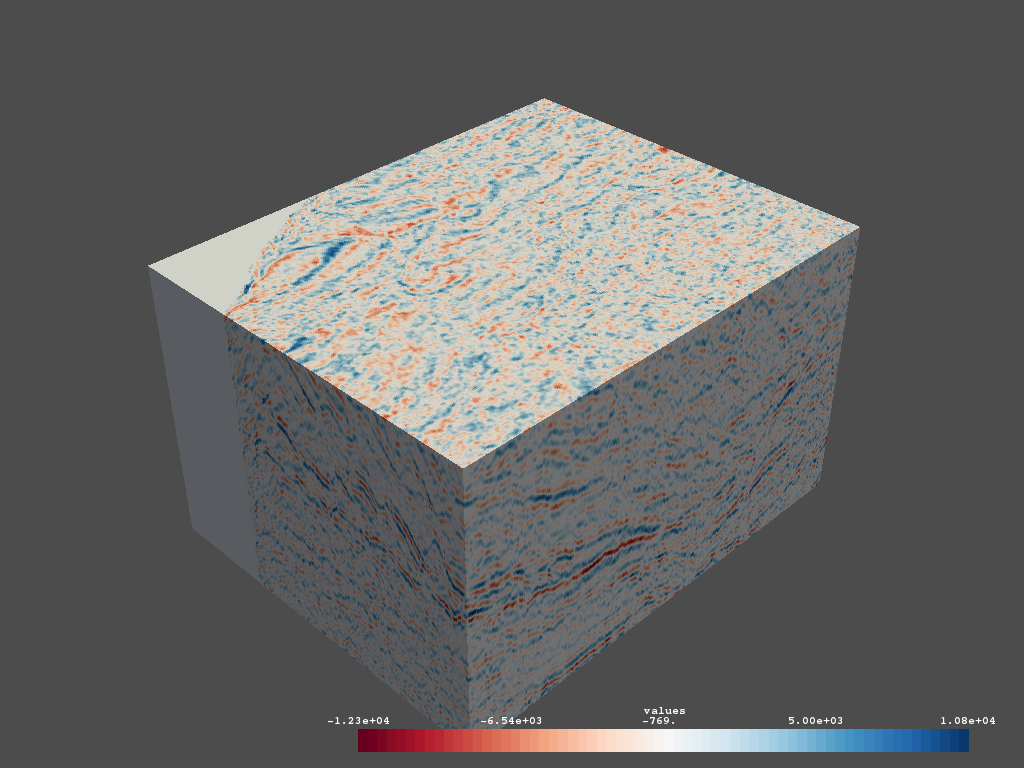

In [47]:
grid.plot(show_edges=False, cmap=cmap)

In [48]:
slices = grid.slice_orthogonal()


In [54]:
hasattr(seismic, "grid")

False

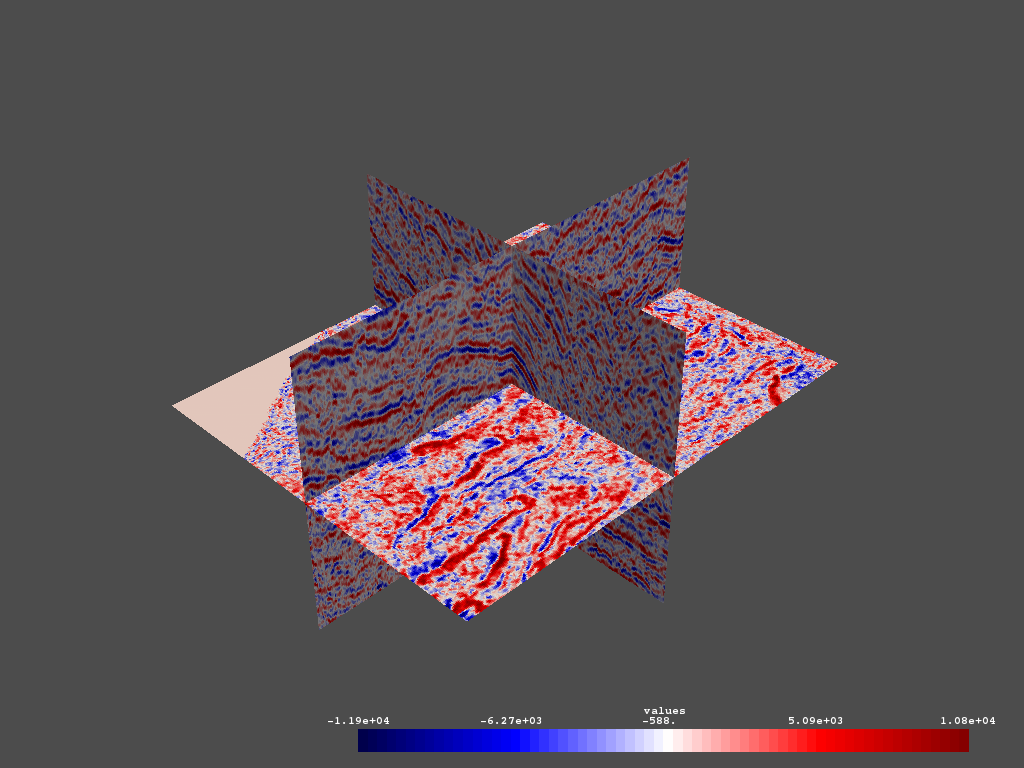

In [56]:
slices.plot(cmap="seismic")
